In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [40]:
df = pd.read_csv('./dataset/Mall_Customers.csv', usecols=['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
df.head()

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

In [41]:
def diagnose_data(df):
    print(f'shape:\n{df.shape}\n')
    print(f'columns:')
    for col in sorted(df.columns):
        print(col)
    print(f'\nnull values:\n{df.isnull().sum()}\n')
    print(f'info:\n')
    df.info()
    print(f'n dtypes:\n{df.dtypes.value_counts()}\n')
    print(f'sum of unique values:\n{df.nunique()}\n')
    print(f'unique values:')
    for col in df.columns:
        print(f'{col}: {df[col].unique()}')
    return df.head()

def get_data_type(df, types='object'):
    object_type = [type for type in df.dtypes.unique() if type == object]
    numeric_type = [type for type in df.dtypes.unique() if type != object]
    
    if types == 'object':
        return df.select_dtypes(object_type) 
    elif types == 'numeric':
        return df.select_dtypes(numeric_type) 
    else:
        return 'something went wrong, check again your types'

In [42]:
diagnose_data(df)

shape:
(200, 4)

columns:
Age
Annual Income (k$)
Genre
Spending Score (1-100)

null values:
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB
n dtypes:
int64     3
object    1
dtype: int64

sum of unique values:
Genre                      2
Age                       51
Annual Income (k$)        64
Spending Score (1-100)    84
dtype: int64

unique values:
Genre: ['Male' 'Female']
Age: [19 21 20 23 31 22 35 64 30 67 58 24 37 52 25 46 54 29 45 40 60 

Genre  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40

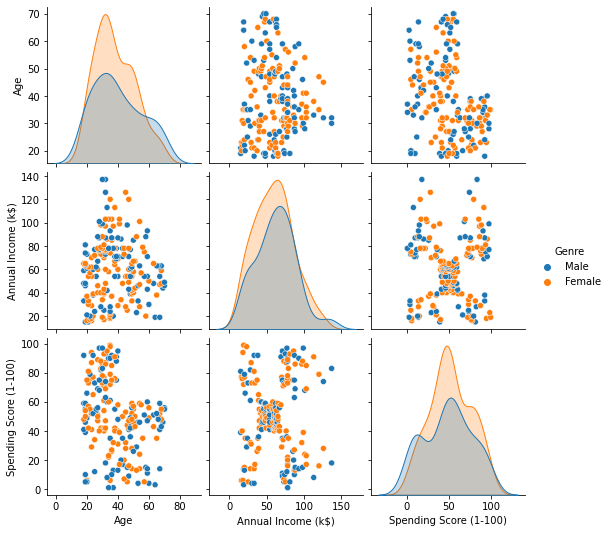

In [44]:
sns.pairplot(data=df, hue='Genre')
plt.show()

In [53]:
new_data = df[['Annual Income (k$)', 'Spending Score (1-100)']]
new_data

Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]

In [54]:
scaler = MinMaxScaler()
new_data.loc[:, new_data.columns] = scaler.fit_transform(new_data)
new_data

C:\Users\Angga\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


Annual Income (k$)  Spending Score (1-100)
0              0.000000                0.387755
1              0.000000                0.816327
2              0.008197                0.051020
3              0.008197                0.775510
4              0.016393                0.397959
..                  ...                     ...
195            0.860656                0.795918
196            0.909836                0.275510
197            0.909836                0.744898
198            1.000000                0.173469
199            1.000000                0.836735

[200 rows x 2 columns]

In [56]:
k_range=range(1,10)
sse=[]
for k in k_range:
    km=KMeans(n_clusters=k)
    km.fit(new_data)
    sse.append(km.inertia_)

C:\Users\Angga\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


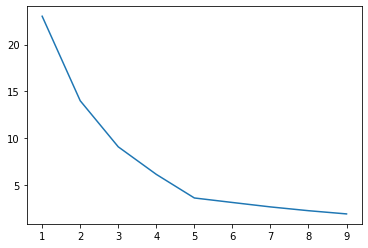

In [57]:
plt.plot(k_range,sse)

In [58]:
model = KMeans(n_clusters=5)
df_pred = model.fit_predict(new_data)
df_pred

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 3,
       1, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 2, 4, 3, 4, 2, 4, 2, 4,
       3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 3, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [62]:
final_df = pd.concat([df, pd.Series(df_pred, name='cluster')], axis='columns')

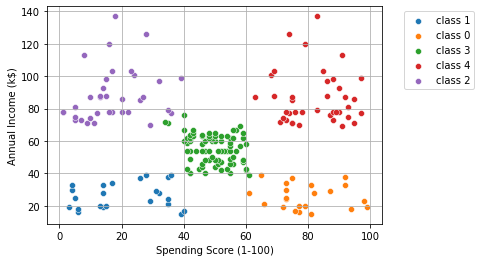

In [81]:
for cluster in final_df['cluster'].unique():
    sns.scatterplot(
        x='Spending Score (1-100)', 
        y='Annual Income (k$)', 
        data=final_df[final_df['cluster'] == cluster], 
        label=f'class {cluster}'
    )
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()